In [1]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import altair as alt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the csv file data into th notebook
train_data=pd.read_csv("ACME-HappinessSurvey2020.csv")

In [3]:
# dataset summary statistics through .describe()
train_data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
# data shape
train_data.shape

(126, 7)

In [5]:
# viewing first few rows of the dataset
train_data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [6]:
# checking for the missing data in the dataset
missing_data = train_data.isnull()
# checking if any columns has missing values
missing_counts = missing_data.sum()
if missing_counts.sum() > 0:
    print("Missing values found in the dataset.")
    print("Missing value counts in each column:")
    print(missing_counts)
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [7]:
# dataset info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [8]:
# here the target attribute is Y  and X1 to X6 are the features as given in the project description
print('Target Variable')
print(train_data.groupby(['Y']).Y.count())
# creating an altair graph to plot happy vs unhappy customers
chart = alt.Chart(train_data, width=500, height=300).mark_bar().encode(
    x=alt.X('Y:O', axis=alt.Axis(title='Y')),
    y=alt.Y('count():Q')
).properties(title='Happy vs Unhappy customers')

chart

Target Variable
Y
0    57
1    69
Name: Y, dtype: int64


alt.Chart(...)

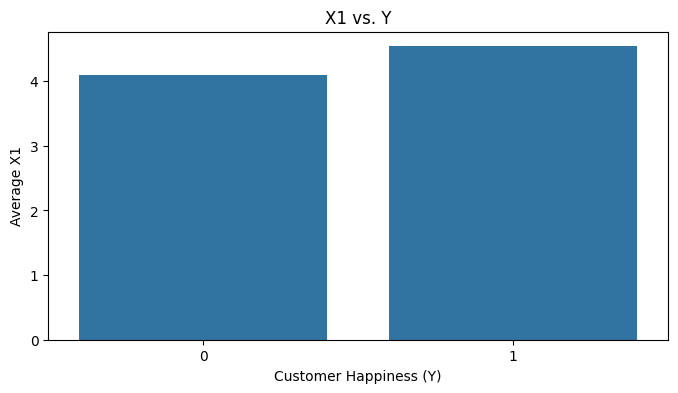

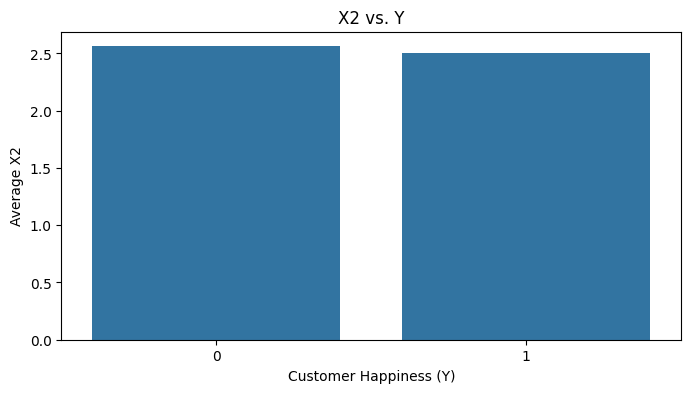

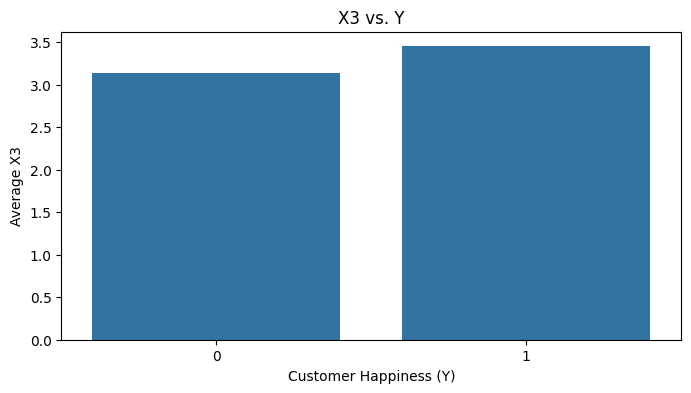

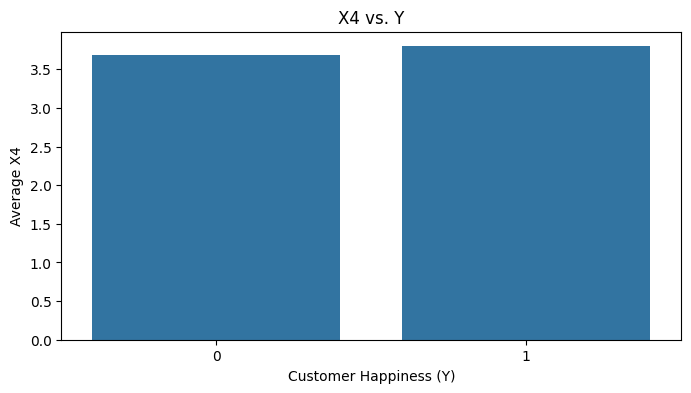

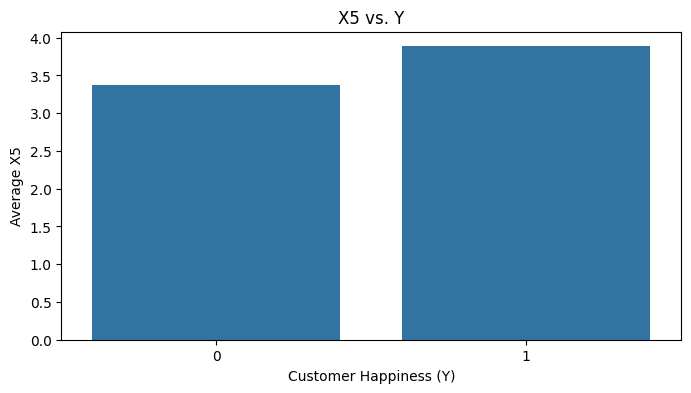

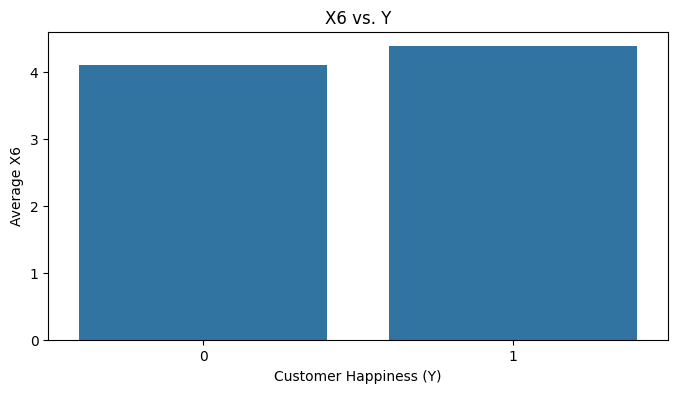

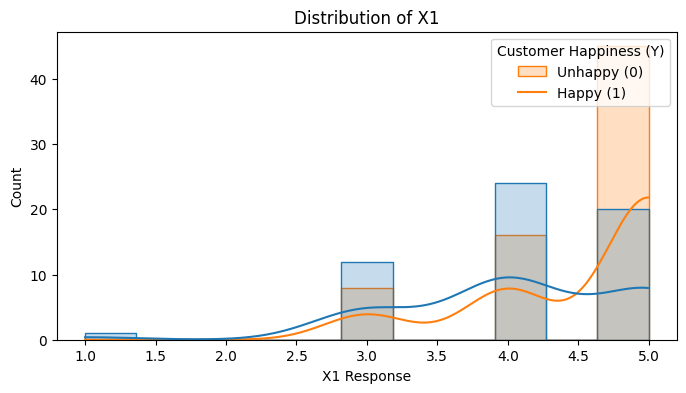

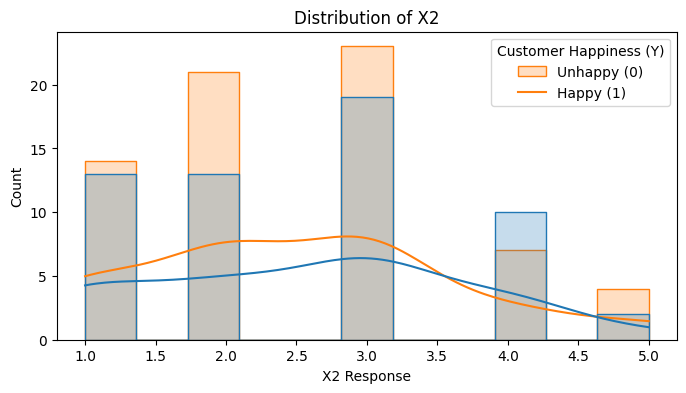

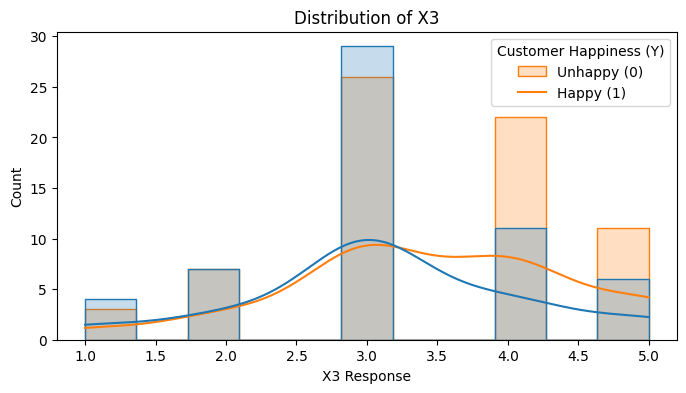

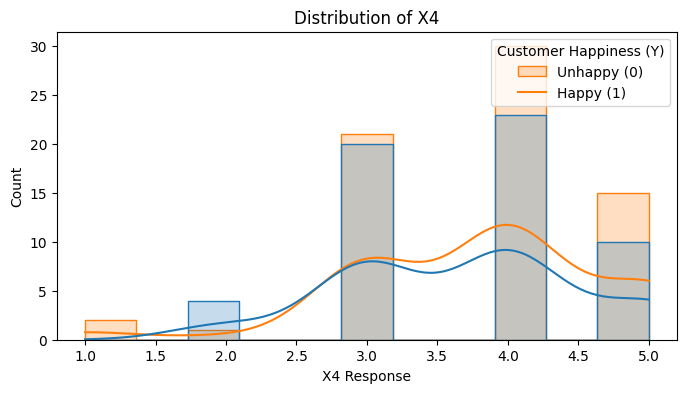

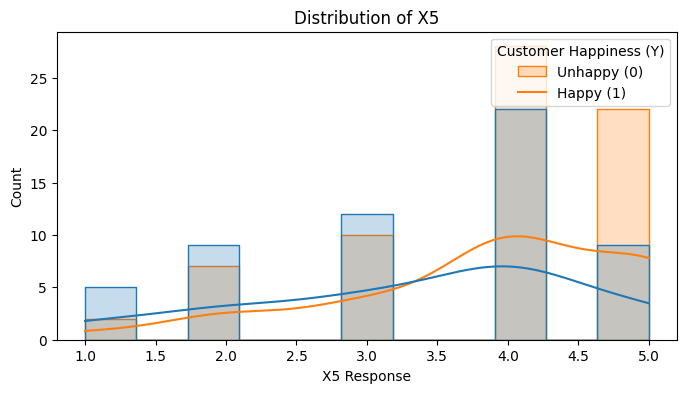

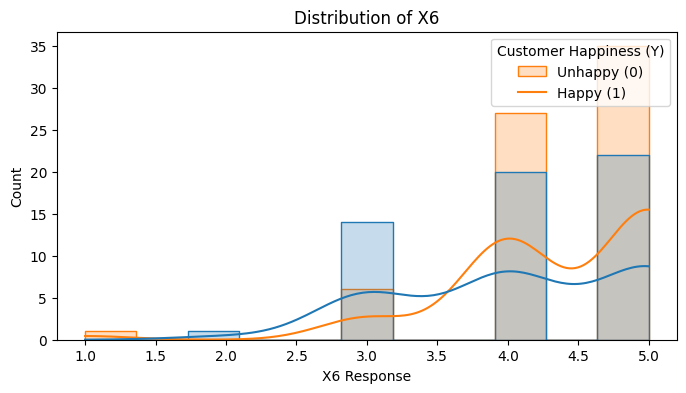

In [9]:
# Explore feature vs. target relationships
features = ["X1", "X2", "X3", "X4", "X5", "X6"]
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.barplot(x="Y", y=feature, data=train_data, ci=None)
    plt.title(f"{feature} vs. Y")
    plt.xlabel("Customer Happiness (Y)")
    plt.ylabel(f"Average {feature}")
    plt.show()

# Visualize the distribution of features
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train_data, x=feature, kde=True, hue="Y", element="step", common_norm=False)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(f"{feature} Response")
    plt.ylabel("Count")
    plt.legend(title="Customer Happiness (Y)", labels=["Unhappy (0)", "Happy (1)"])
    plt.show()

In [10]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
# Split the data into features (X) and the target variable (Y)
X = train_data.drop(columns=['Y'])
Y = train_data['Y']

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [11]:
# fit the data in the model
# logistic regression
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(X_train, Y_train)

LogisticRegression()

In [12]:
# Predict
Y_pred_lreg = lreg.predict(X_test)

# Score It
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred_lreg))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(Y_test,Y_pred_lreg))

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(Y_test, Y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[ 5 10]
 [ 4  7]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.56      0.33      0.42        15
           1       0.41      0.64      0.50        11

    accuracy                           0.46        26
   macro avg       0.48      0.48      0.46        26
weighted avg       0.49      0.46      0.45        26

--------------------------------------------------------------------------------
Accuracy 46.15 %


In [13]:
# fit the data in the model
# linear support vector classifier
from sklearn.svm import SVC

# Instantiate the model
svc = SVC()

# Fit the model on training data
svc.fit(X_train, Y_train)

SVC()

In [14]:
# Predict
Y_pred_svc = svc.predict(X_test)

# Score It
print('Support Vector Classifier')
print('\n')
# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred_svc))
print('--'*40)

# Classification report
print('Classification Report')
print(classification_report(Y_test, Y_pred_svc))

# Accuracy
print('--'*40)
svc_accuracy = round(accuracy_score(Y_test, Y_pred_svc)*100,2)
print('Accuracy', svc_accuracy,'%')

Support Vector Classifier


Confusion Matrix
[[ 3 12]
 [ 2  9]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.20      0.30        15
           1       0.43      0.82      0.56        11

    accuracy                           0.46        26
   macro avg       0.51      0.51      0.43        26
weighted avg       0.53      0.46      0.41        26

--------------------------------------------------------------------------------
Accuracy 46.15 %


In [15]:
# SVC Parameter Tuning with GridSearch
# Create parameter grid
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

# Fit 
# Import
from sklearn.model_selection import GridSearchCV

# Instantiate grid object
grid = GridSearchCV(SVC(),param_grid, refit = True, verbose = 1)#verbose is the text output describing the process

# Fit to training data
grid.fit(X_train,Y_train)

# Call best_params attribute
print(grid.best_params_)
print('\n')
# Call best_estimators attribute
print(grid.best_estimator_)

# Predict using best parameters
Y_pred_grid = grid.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


SVC(C=1000, gamma=0.001)


In [16]:
# Score It
# Confusion Matrix
print('SVC with GridSearchCV')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred_grid))
print('--'*40)
# Classification Report
print('Classification Report')
print(classification_report(Y_test, Y_pred_grid))

# Accuracy
print('--'*40)
svc_grid_accuracy = round(accuracy_score(Y_test, Y_pred_grid)*100,2)
print('Accuracy',svc_grid_accuracy,'%')

SVC with GridSearchCV


Confusion Matrix
[[ 5 10]
 [ 3  8]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.33      0.43        15
           1       0.44      0.73      0.55        11

    accuracy                           0.50        26
   macro avg       0.53      0.53      0.49        26
weighted avg       0.55      0.50      0.48        26

--------------------------------------------------------------------------------
Accuracy 50.0 %


In [17]:
# fit the data in the model
# kernel support vector classifier
from sklearn.svm import SVC

# Instantiate model object
ksvc= SVC(kernel = 'rbf', random_state = 0)

# Fit on training data
ksvc.fit(X_train, Y_train)

# Predict
Y_pred_ksvc = ksvc.predict(X_test)

# Score it
print('Kernel SVC')
# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred_ksvc))

# Classification Report
print('--'*40)
print('Classification Report')
print(classification_report(Y_test, Y_pred_ksvc))

# Accuracy
print('--'*40)
ksvc_accuracy = round(accuracy_score(Y_test,Y_pred_ksvc)*100,1)
print('Accuracy',ksvc_accuracy,'%')

Kernel SVC


Confusion Matrix
[[ 3 12]
 [ 2  9]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.20      0.30        15
           1       0.43      0.82      0.56        11

    accuracy                           0.46        26
   macro avg       0.51      0.51      0.43        26
weighted avg       0.53      0.46      0.41        26

--------------------------------------------------------------------------------
Accuracy 46.2 %


In [18]:
# fit the data in the model
# k nearest neighbours
# Standardize the Variables

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create instance of standard scaler
scaler = StandardScaler()

# Fit scaler object to feature columns
scaler.fit(train_data.drop('Y', axis = 1)) # Everything but target variable 

# Use scaler object to do a transform columns
scaled_features = scaler.transform(train_data.drop('Y', axis = 1)) # performs the standardization by centering and scaling
scaled_features

array([[-1.67332005,  0.42167606, -0.30364219,  0.29114981, -1.44416589,
        -0.31506076],
       [-1.67332005, -0.47885247, -0.30364219,  1.43755219,  0.30549663,
        -1.55561249],
       [ 0.83666003,  0.42167606, -0.30364219, -0.85525257, -0.56933463,
         0.92549097],
       [ 0.83666003,  1.32220458, -0.30364219, -0.85525257, -0.56933463,
         0.92549097],
       [ 0.83666003,  1.32220458, -0.30364219, -0.85525257, -0.56933463,
         0.92549097],
       [ 0.83666003,  2.22273311, -0.30364219,  1.43755219,  1.18032789,
         0.92549097],
       [-1.67332005, -1.379381  , -1.28464005, -2.00165494, -2.31899715,
        -1.55561249],
       [ 0.83666003,  1.32220458,  0.67735566,  0.29114981,  0.30549663,
         0.92549097],
       [-0.41833001, -1.379381  ,  0.67735566,  0.29114981,  0.30549663,
        -0.31506076],
       [-0.41833001,  1.32220458,  0.67735566, -2.00165494,  1.18032789,
         0.92549097],
       [-1.67332005, -0.47885247, -0.30364219, -0.

In [19]:
# Use scaled features variable to re-create a features dataframe
df_feat = pd.DataFrame(scaled_features, columns = train_data.columns[:-1])
# Split
# Import
from sklearn.model_selection import train_test_split

# Create matrix of features
x = df_feat

# Create target variable
y = train_data['Y']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = .20, random_state = 101)
# Fit
# Import model
from sklearn.neighbors import KNeighborsClassifier

# Create instance of model
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit to training data
knn.fit(X_train,Y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
# Predict
Y_pred_knn = knn.predict(X_test)
# Score it
print('K-Nearest Neighbors (KNN)')
print('k = 1')
print('\n')
# Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(Y_test,Y_pred_knn))

# Classification Report
print('--'*40)
print('Classification Report')
print(classification_report(Y_test, Y_pred_knn))

# Accuracy
print('--'*40)
knn_accuracy = round(accuracy_score(Y_test, Y_pred_knn)*100,1)
print('Accuracy',knn_accuracy,'%')

K-Nearest Neighbors (KNN)
k = 1


Confusion Matrix
[[ 7  4]
 [ 2 13]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.76      0.87      0.81        15

    accuracy                           0.77        26
   macro avg       0.77      0.75      0.76        26
weighted avg       0.77      0.77      0.76        26

--------------------------------------------------------------------------------
Accuracy 76.9 %


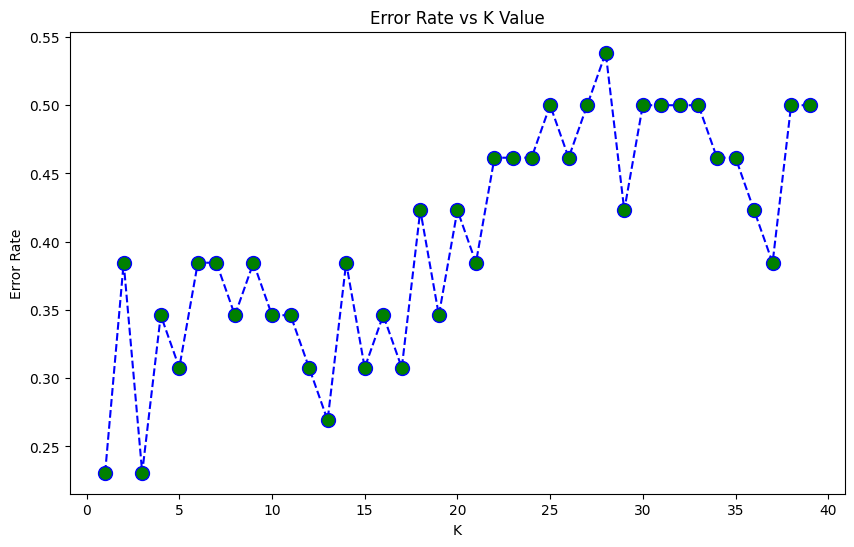

In [20]:
# knn parameter tuning for more better accuracy
# Function
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
# at k=1, we get the desired accuracy

In [21]:
# fit the data in the model
# decision tree model

# Fit
# Import model
from sklearn.tree import DecisionTreeClassifier

# Create model object
dtree = DecisionTreeClassifier()

# Fit to training sets
dtree.fit(X_train,Y_train)

# Predict
Y_pred_dtree = dtree.predict(X_test)
# Score It
print('Decision Tree')
# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred_dtree))

# Classification Report
print('--'*40)
print('Classification Report',classification_report(Y_test, Y_pred_dtree))

# Accuracy
print('--'*40)
dtree_accuracy = round(accuracy_score(Y_test, Y_pred_dtree)*100,2)
print('Accuracy',dtree_accuracy,'%')

Decision Tree


Confusion Matrix
[[6 5]
 [9 6]]
--------------------------------------------------------------------------------
Classification Report               precision    recall  f1-score   support

           0       0.40      0.55      0.46        11
           1       0.55      0.40      0.46        15

    accuracy                           0.46        26
   macro avg       0.47      0.47      0.46        26
weighted avg       0.48      0.46      0.46        26

--------------------------------------------------------------------------------
Accuracy 46.15 %


In [22]:
# fit the data in the model
# random forest model
# Fit
# Import model object
from sklearn.ensemble import RandomForestClassifier

# Create model object
rfc = RandomForestClassifier(n_estimators = 200)

# Fit model to training data
rfc.fit(X_train,Y_train)

# Predict
Y_pred_rfc = rfc.predict(X_test)
# Score It
print('Random Forest')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred_rfc))

# Classification report
print('--'*40)
print('Classification Report')
print(classification_report(Y_test, Y_pred_rfc))

# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(Y_test, Y_pred_rfc)*100,2)
print('Accuracy', rf_accuracy,'%')

# do hyperparameter tuning for this model, and for every model

Random Forest


Confusion Matrix
[[ 5  6]
 [ 3 12]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.67      0.80      0.73        15

    accuracy                           0.65        26
   macro avg       0.65      0.63      0.63        26
weighted avg       0.65      0.65      0.64        26

--------------------------------------------------------------------------------
Accuracy 65.38 %


In [23]:
pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
# xgboost model
import xgboost as xgb

# Initialize and train an XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred) * 100
print(f"Accuracy: {accuracy :.2f}%")

#accuracy = accuracy_score(Y_test, Y_pred)
#print(f"Accuracy: {accuracy * 100:.2f}%")

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 53.85%
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.36      0.40        11
           1       0.59      0.67      0.62        15

    accuracy                           0.54        26
   macro avg       0.52      0.52      0.51        26
weighted avg       0.53      0.54      0.53        26

Confusion Matrix:
[[ 4  7]
 [ 5 10]]


In [25]:
import pandas as pd

# Model names and their corresponding scores
models = pd.DataFrame({
    'model_names': ['Logistic Regression', 'Linear SVC', 'Kernel SVC', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'XG Boost'],
    'scores': [logreg_accuracy, svc_grid_accuracy, ksvc_accuracy, knn_accuracy, dtree_accuracy, rf_accuracy, accuracy] #rows in model_names and scores differ
})

# Sort the DataFrame by 'scores' in descending order
models.sort_values(by='scores', ascending=False)


,model_names,scores
3,K-Nearest Neighbors,76.900000
5,Random Forest,65.380000
6,XG Boost,53.846154
1,Linear SVC,50.000000
2,Kernel SVC,46.200000
0,Logistic Regression,46.150000
4,Decision Tree,46.150000


In [29]:
# feature selection to highlight which feature is important through Gini Indexd using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

# Get feature importances (Gini index)
feature_importances_gini = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_gini_df = pd.DataFrame({'Feature': X.columns, 'Importance (Gini)': feature_importances_gini})
feature_importance_gini_df = feature_importance_gini_df.sort_values(by='Importance (Gini)', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_gini_df)

  Feature  Importance (Gini)
1      X2           0.199372
2      X3           0.187165
0      X1           0.172273
4      X5           0.167077
3      X4           0.158680
5      X6           0.115434


In [30]:
# feature selection to highlught which feature to choose using information gain through decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif

# Train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

# Calculate information gain for each feature
information_gain = mutual_info_classif(X_train, Y_train)

# Create a DataFrame to display information gain
information_gain_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': information_gain})
information_gain_df = information_gain_df.sort_values(by='Information Gain', ascending=False)

# Display the information gain DataFrame
print(information_gain_df)

  Feature  Information Gain
0      X1          0.073873
3      X4          0.007745
1      X2          0.000000
2      X3          0.000000
4      X5          0.000000
5      X6          0.000000
